# Ploteo de señales

Se va plotear las señales que fueron capturadas mediante el uso de Bitalino en modo EMG, se grabaron para tres estadíos: reposo, realizando una fuerza de tensión y una fuerza de oposición

##### Importación de librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Definición de constantes

In [3]:
Fs = 1000 #Se emplearon 1000Hz
Ts=1/Fs
print(f"La frecuencia de muestreo es Fs = {Fs} hz\n El periodo es Ts = {Ts} s")

La frecuencia de muestreo es Fs = 1000 hz
 El periodo es Ts = 0.001 s


### Estado de reposo

[[  0.   0.   0. ...   0. 518.  nan]
 [  1.   0.   0. ...   0. 518.  nan]
 [  2.   0.   0. ...   0. 512.  nan]
 ...
 [ 15.   0.   0. ...   0. 513.  nan]
 [  0.   0.   0. ...   0. 516.  nan]
 [  1.   0.   0. ...   0. 518.  nan]]
[0.2101338  0.2101338  0.20768087 ... 0.20808969 0.20931615 0.2101338 ]


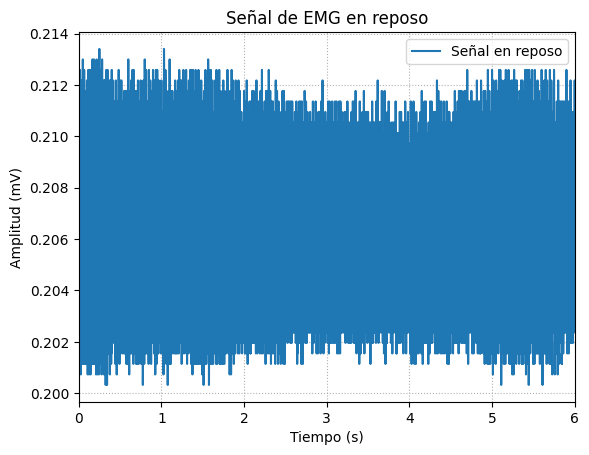

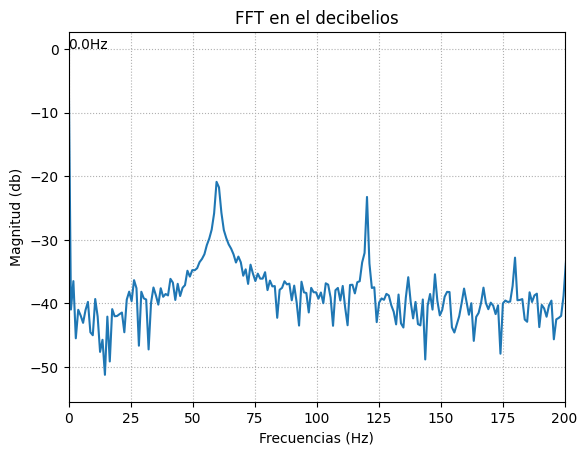

In [12]:
array_reposo = np.genfromtxt("Reposo.txt",delimiter="	",skip_header = 2) #leemos el archivo txt
print(array_reposo) #imprimimos el array generado

M = array_reposo[:,-2].shape[0] #longitud de la señal

n = np.arange(0,M)
t = n*Ts #vector tiempo
valores=array_reposo[:,-2]
voltios=(((valores/(2^10))-1/2)*3.3)/(1009) #señal en mV, la fórmula fue obtenida de la hoja de datos del sensor bitalino
print(voltios)
plt.plot(t, voltios,label="Señal en reposo")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.legend(loc="upper right")
plt.xlim([0, 6])  # Ajustamos el eje x para que se vea mejor
plt.title("Señal de EMG en reposo")
plt.show()

N = 2**10  #resolución


signal_fft = np.fft.fft(valores, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,Fs/2, N//2)
F = np.round(F_list[np.argmax(signal_fft_db)], 1)   # argmax, encuentra el argumento max en un array

plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en el decibelios")
plt.xlim([0,200])
plt.show()

### Realizando tensión

[[  0.   0.   0. ...   0. 508.  nan]
 [  1.   0.   0. ...   0. 508.  nan]
 [  2.   0.   0. ...   0. 506.  nan]
 ...
 [ 15.   0.   0. ...   0. 509.  nan]
 [  0.   0.   0. ...   0. 509.  nan]
 [  1.   0.   0. ...   0. 506.  nan]]


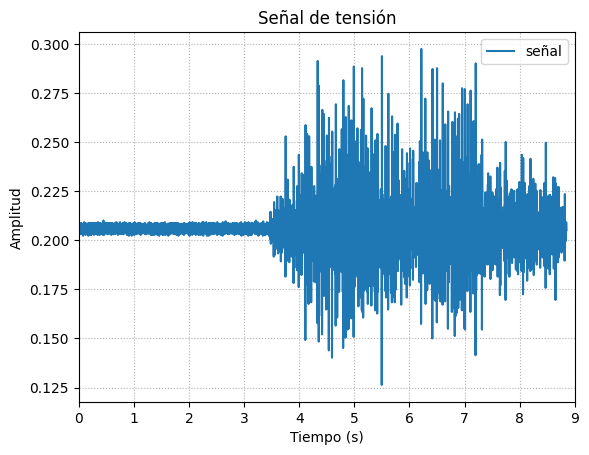

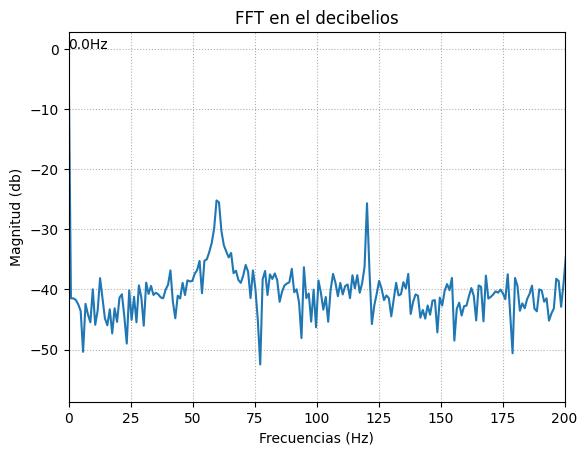

In [17]:
array_tension = np.genfromtxt("Tensión.txt", delimiter="	",skip_header = 2)
print(array_tension) #imprimimos el array generado

M = array_tension[:,-2].shape[0] #longitud de la señal

n = np.arange(0,M)
t = n*Ts #vector tiempo
valores=array_tension[:,-2]
voltios=(((valores/(2^10))-1/2)*3.3)/(1009) #señal en mV, la fórmula fue obtenida de la hoja de datos del sensor bitalino

M = array_tension[:,-2].shape[0]

n = np.arange(0,M)
t = n*Ts

plt.plot(t, voltios,label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.legend(loc="upper right")
plt.xlim([0, 9]) 
plt.title("Señal de EMG en tensión")
plt.show()

N = 2**10                                     # 10 bits, 0-1023


signal_fft = np.fft.fft(valores, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,Fs/2, N//2)
F = np.round(F_list[np.argmax(signal_fft_db)], 1)   # argmax, encuentra el argumento max en un array

plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en el decibelios")
plt.xlim([0,200])
#plt.xticks(np.arange(0,200,10))
plt.show()

### Realizando oposición

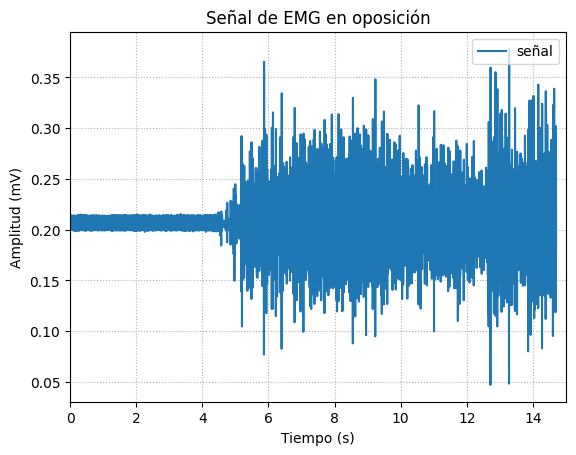

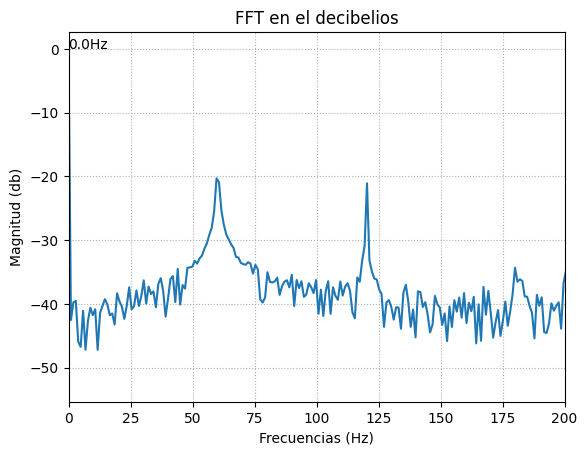

In [21]:
array_oposicion = np.genfromtxt("Oposición.txt", delimiter="	",skip_header = 2)


M = array_oposicion[:,-2].shape[0]
n = np.arange(0,M)
t = n*Ts #vector tiempo
valores=array_oposicion[:,-2]
voltios=(((valores/(2^10))-1/2)*3.3)/(1009) #señal en mV, la fórmula fue obtenida de la hoja de datos del sensor bitalino

plt.plot(t, voltios,label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Señal de EMG en oposición")
plt.legend(loc="upper right")
plt.xlim([0, 15])  # Adjust this to change the range of x-axis
plt.show()

N = 2**10                                     # 10 bits, 0-1023


signal_fft = np.fft.fft(valores, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,Fs/2, N//2)
F = np.round(F_list[np.argmax(signal_fft_db)], 1)   # argmax, encuentra el argumento max en un array

plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en el decibelios")
plt.xlim([0,200])
#plt.xticks(np.arange(0,200,10))
plt.show()